In [36]:
%%capture
from IPython.display import display, Markdown
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append(".src")
from src.data import utils
from src.data.fitbit import sleep, activity
from src.models import ols

%load_ext nb_black
%matplotlib inline

<IPython.core.display.Javascript object>

In [19]:
# Parameters
report = {
    "title": "The effect of magnesium supplementation on sleep quality: evidence from my personal activity tracker",
    "author": "Peter Richens",
    "design": "A blinded randomised trial was conducted on 1 adult male (me). The patient's sleep episodes where randomly allocated into the magnesium or the control group and received 400 mg magnesium citrate or an over-the-counter multivitamin supplement. Sleep activity was tracked by the patient's Fitbit device.",
    "keywords": [
        "magnesium",
        "sleep",
        "magnesium supplementation",
        "insomnia",
        "activity trackers",
        "fitbit",
    ],
    "related_studies": "https://www.connectedpapers.com/main/042fc87490256d934f2b025b6ca6c6115be73404",
    "source": "https://github.com/peterjrichens/personal-rct",
}
data = {
    "source": "fitbit",
    "path": "data/MyFitbitData/PeterRichens",
    "start_date": "2021-03-11",
    "end_date": "2021-05-23",
}
treatment = {
    "dates": {
        "magnesium": [
            "2021-04-11",
            "2021-04-13",
            "2021-04-15",
            "2021-04-17",
            "2021-04-19",
            "2021-04-23",
            "2021-04-25",
            "2021-04-27",
            "2021-04-29",
            "2021-05-03",
            "2021-05-05",
            "2021-05-09",
            "2021-05-11",
            "2021-05-13",
            "2021-05-15",
            "2021-05-17",
            "2021-05-19",
            "2021-05-21",
            "2021-05-19",
            "2021-05-21",
        ],
        "multivitamin": [
            "2021-04-12",
            "2021-04-14",
            "2021-04-16",
            "2021-04-18",
            "2021-04-20",
            "2021-04-22",
            "2021-04-24",
            "2021-04-26",
            "2021-04-28",
            "2021-04-30",
            "2021-05-02",
            "2021-05-04",
            "2021-05-06",
            "2021-05-08",
            "2021-05-10",
            "2021-05-12",
            "2021-05-14",
            "2021-05-16",
            "2021-05-18",
            "2021-05-20",
            "2021-05-18",
            "2021-05-20",
            "2021-05-22",
        ],
    },
    "exclude_dates": ["2021-04-21", "2021-05-01", "2021-05-07"],
    "reference": "multivitamin",
    "target": "magnesium",
}
model = {
    "dependent_variables": [
        "composite_sleep_score",
        "total_sleep_duration",
        "rem_sleep_duration",
        "deep_sleep_duration",
    ],
    "control_variables": ["day_of_week", "sleep_start_time", "steps", "calories"],
}

<IPython.core.display.Javascript object>

In [3]:
treatment_df = utils.get_treatment_df(
    data["start_date"], data["end_date"], treatment
).pipe(utils.add_day_of_week)

assert data["source"] == "fitbit"

sleep_df = (
    utils.load_data(data["path"], "Sleep/sleep-*.json")
    .pipe(sleep.filter_main_sleep)
    .pipe(sleep.add_treatment_date)
    .pipe(sleep.add_sleep_start_time)
    .pipe(sleep.add_total_sleep_duration)
    .pipe(sleep.add_stage_duration)
    .pipe(sleep.select_columns)
    .pipe(utils.validate)
)

sleep_score_df = utils.load_data(data["path"], "Sleep/sleep_score.csv").pipe(
    sleep.filter_sleep_score
)

steps_df = (
    utils.load_data(data["path"], "Physical Activity/steps-*.json")
    .pipe(activity.sum_by_treatment_date, "steps")
    .pipe(utils.validate)
)

calories_df = (
    utils.load_data(data["path"], "Physical Activity/calories-*.json")
    .pipe(activity.sum_by_treatment_date, "calories")
    .pipe(utils.validate)
)

<IPython.core.display.Javascript object>

In [5]:
df = (
    treatment_df.merge(sleep_df, on="treatment_date", how="left")
    .merge(sleep_score_df, on="treatment_date", how="left")
    .merge(steps_df, on="treatment_date", how="left")
    .merge(calories_df, on="treatment_date", how="left")
    .pipe(utils.validate)
)

<IPython.core.display.Javascript object>

In [6]:
results = []
for dependent_variable in model["dependent_variables"]:
    formula = ols.build_formula(
        df, dependent_variable, treatment, model["control_variables"]
    )
    results.append(
        ols.result_to_english(
            ols.fit_model(df, formula), dependent_variable, treatment
        ),
    )

<IPython.core.display.Javascript object>

In [20]:
display(Markdown(f" # {report['title']}"))
display(Markdown(f" \n"))

display(Markdown(f" Author: {report['author']}"))
display(Markdown(f" Date: {time.strftime('%d %b %Y')}"))

display(Markdown(f" Keywords: {', '.join(report['keywords'])}"))

display(Markdown(f" ## Design"))
display(Markdown(f" \n"))
display(Markdown(f" {report['design']}"))
display(Markdown(f" See [related studies]({report['related_studies']})."))
display(Markdown(f" Source code available at: {report['source']}."))

display(Markdown(f" ## Results"))
display(Markdown(f" \n"))
for result in results:
    display(Markdown(f"* {result}"))

 # The effect of magnesium supplementation on sleep quality: evidence from my personal activity tracker

 Author: Peter Richens

 Date: 25 May 2021

 Keywords: magnesium, sleep, magnesium supplementation, insomnia, activity trackers, fitbit

 ## Design

 A blinded randomised trial was conducted on 1 adult male (me). The patient's sleep episodes where randomly allocated into the magnesium or the control group and received 400 mg magnesium citrate or an over-the-counter multivitamin supplement. Sleep activity was tracked by the patient's Fitbit device.

 See [related studies](https://www.connectedpapers.com/main/042fc87490256d934f2b025b6ca6c6115be73404).

 Source code available at: https://github.com/peterjrichens/personal-rct.

 ## Results

* Magnesium had a 0.61 standard deviation decrease on composite sleep score relative to the multivitamin treatment (p value=0.022).

* Magnesium had a 0.47 standard deviation decrease on total sleep duration relative to the multivitamin treatment (p value=0.036).

* The effect on rem sleep duration was not statistically signficant.

* The effect on deep sleep duration was not statistically signficant.

<IPython.core.display.Javascript object>

## Sample size

In [8]:
sample_size = (
    df[df.experiment_active]
    .treatment.value_counts()
    .rename("number_of_days")
    .to_frame()
)
sample_size.loc["total"] = sample_size.sum()
sample_size

,number_of_days
multivitamin,21
magnesium,18
total,39


<IPython.core.display.Javascript object>

## Summary statistics during pre-experiment baseline

In [9]:
df[df.experiment_active == False].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_sleep_duration,31.0,455.096774,46.125448,351.00,432.50,461.0,483.50,538.00
deep_sleep_duration,31.0,74.064516,14.897283,42.00,62.00,76.0,82.00,101.00
rem_sleep_duration,31.0,88.645161,27.983982,36.00,73.50,88.0,107.00,140.00
sleep_start_time,31.0,-10.241935,57.244777,-150.00,-43.25,-16.0,14.50,132.00
composite_sleep_score,31.0,79.322581,6.640216,63.00,77.00,81.0,83.00,89.00
steps,31.0,4580.032258,2423.843277,1201.00,2426.00,3850.0,6294.00,12022.00
calories,31.0,2259.266129,192.678554,1835.01,2139.78,2233.0,2384.74,2739.58


<IPython.core.display.Javascript object>

## Summary statistics during experiment period

In [10]:
df[df.experiment_active].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_sleep_duration,39.0,469.333333,34.868424,403.00,449.500,462.00,487.5,555.00
deep_sleep_duration,39.0,74.230769,20.303567,22.00,62.000,73.00,87.5,118.00
rem_sleep_duration,39.0,110.666667,29.720924,45.00,89.000,112.00,132.5,178.00
sleep_start_time,39.0,-42.435897,45.255732,-120.50,-75.000,-47.50,-19.5,99.50
composite_sleep_score,39.0,81.230769,5.193425,68.00,78.000,82.00,85.0,90.00
steps,39.0,5077.358974,2714.442935,1450.00,2532.500,5056.00,7160.5,12205.00
calories,39.0,2316.572308,254.479274,1884.07,2123.755,2302.92,2474.2,3283.53


<IPython.core.display.Javascript object>

## Outcome variables over time

Red line shows start of experiment period.

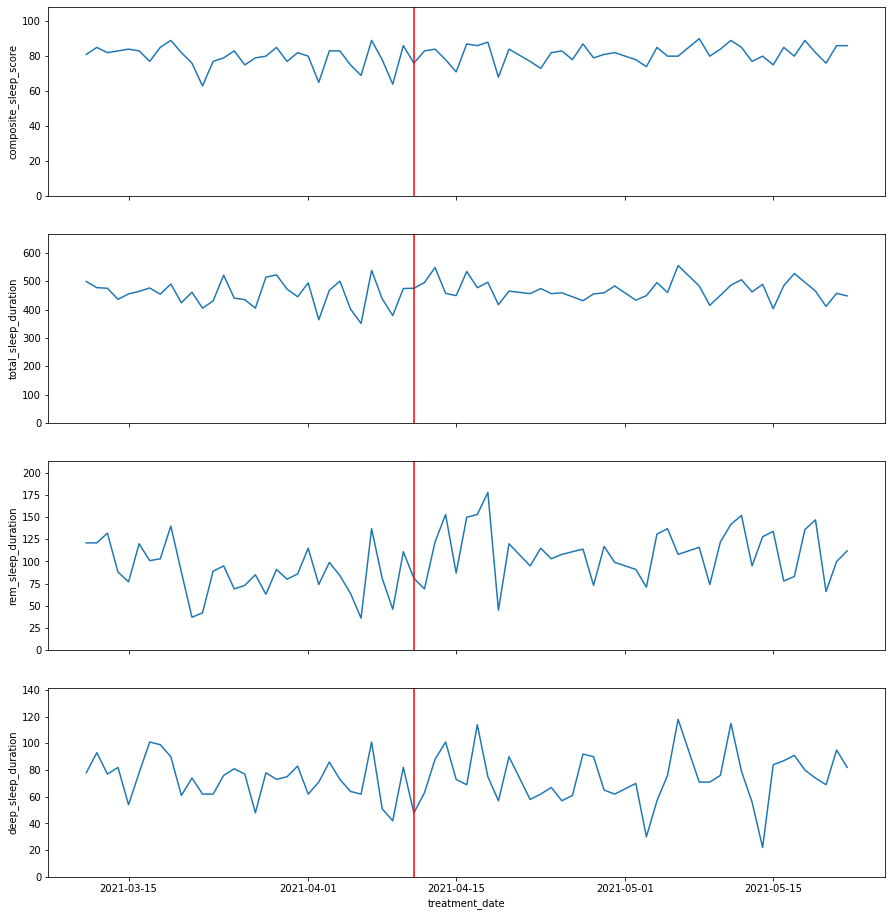

<IPython.core.display.Javascript object>

In [13]:
num_plots = len(model["dependent_variables"])
dims = (15, 4 * num_plots)
_, axes = plt.subplots(num_plots, figsize=dims, sharex=True)
for ax, v in zip(axes, model["dependent_variables"]):
    g = sns.lineplot("treatment_date", v, data=df, ax=ax)
    g = g.set(ylim=(0, df[v].max()*1.2))
    ax.axvline(df[df.experiment_active].treatment_date.min(), c='r')


## Regression results

In [37]:
for dependent_variable in model["dependent_variables"]:
    display(Markdown(f"### Results for {dependent_variable.replace('_', ' ')}"))
    formula = ols.build_formula(
        df, dependent_variable, treatment, model["control_variables"]
    )
    result = ols.fit_model(df, formula)
    display(Markdown(ols.result_to_english(result, dependent_variable, treatment)))
    display(result.summary())

### Results for composite sleep score

Magnesium had a 0.61 standard deviation decrease on composite sleep score relative to the multivitamin treatment (p value=0.022).

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     standardize(composite_sleep_score)   R-squared:                       0.481
Model:                                            OLS   Adj. R-squared:                  0.296
Method:                                 Least Squares   F-statistic:                     6.673
Date:                                Tue, 25 May 2021   Prob (F-statistic):           3.28e-05
Time:                                        10:08:27   Log-Likelihood:                -42.544
No. Observations:                                  39   AIC:                             107.1
Df Residuals:                                      28   BIC:                             125.4
Df Model:                                          10                                         
Covariance Type:                                  HAC                                         
==================================================================================================================================
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          0.1803      0.556      0.324      0.746      -0.909       1.270
C(treatment, Treatment(reference='multivitamin'))[T.magnesium]    -0.6064      0.266     -2.283      0.022      -1.127      -0.086
C(day_of_week)[T.Monday]                                          -0.5101      0.557     -0.916      0.360      -1.602       0.582
C(day_of_week)[T.Saturday]                                         0.6945      0.875      0.794      0.427      -1.020       2.409
C(day_of_week)[T.Sunday]                                           0.3510      0.711      0.494      0.621      -1.042       1.744
C(day_of_week)[T.Thursday]                                        -0.8519      0.655     -1.301      0.193      -2.135       0.431
C(day_of_week)[T.Tuesday]                                          1.1999      0.501      2.394      0.017       0.218       2.182
C(day_of_week)[T.Wednesday]                                       -0.1440      0.696     -0.207      0.836      -1.508       1.220
standardize(sleep_start_time)                                     -0.0616      0.265     -0.232      0.816      -0.582       0.458
standardize(steps)                                                 0.2548      0.206      1.234      0.217      -0.150       0.659
standardize(calories)                                             -0.2180      0.223     -0.976      0.329      -0.656       0.220
==============================================================================
Omnibus:                        1.416   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.493   Jarque-Bera (JB):                1.223
Skew:                          -0.259   Prob(JB):                        0.543
Kurtosis:                       2.304   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

### Results for total sleep duration

Magnesium had a 0.47 standard deviation decrease on total sleep duration relative to the multivitamin treatment (p value=0.036).

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     standardize(total_sleep_duration)   R-squared:                       0.240
Model:                                           OLS   Adj. R-squared:                 -0.032
Method:                                Least Squares   F-statistic:                     3.403
Date:                               Tue, 25 May 2021   Prob (F-statistic):            0.00508
Time:                                       10:08:27   Log-Likelihood:                -49.997
No. Observations:                                 39   AIC:                             122.0
Df Residuals:                                     28   BIC:                             140.3
Df Model:                                         10                                         
Covariance Type:                                 HAC                                         
==================================================================================================================================
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          0.3586      0.255      1.406      0.160      -0.141       0.859
C(treatment, Treatment(reference='multivitamin'))[T.magnesium]    -0.4653      0.222     -2.093      0.036      -0.901      -0.030
C(day_of_week)[T.Monday]                                          -0.3340      0.504     -0.662      0.508      -1.322       0.654
C(day_of_week)[T.Saturday]                                        -0.0439      0.577     -0.076      0.939      -1.175       1.087
C(day_of_week)[T.Sunday]                                          -0.0802      0.428     -0.187      0.852      -0.920       0.760
C(day_of_week)[T.Thursday]                                        -0.5838      0.638     -0.916      0.360      -1.833       0.666
C(day_of_week)[T.Tuesday]                                          0.3578      0.498      0.719      0.472      -0.618       1.334
C(day_of_week)[T.Wednesday]                                       -0.3098      0.385     -0.804      0.421      -1.065       0.445
standardize(sleep_start_time)                                     -0.4793      0.185     -2.586      0.010      -0.843      -0.116
standardize(steps)                                                -0.0132      0.209     -0.063      0.949      -0.422       0.396
standardize(calories)                                              0.1083      0.223      0.487      0.626      -0.328       0.544
==============================================================================
Omnibus:                        3.535   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.364
Skew:                           0.558   Prob(JB):                        0.307
Kurtosis:                       3.459   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

### Results for rem sleep duration

The effect on rem sleep duration was not statistically signficant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     standardize(rem_sleep_duration)   R-squared:                       0.402
Model:                                         OLS   Adj. R-squared:                  0.189
Method:                              Least Squares   F-statistic:                     7.091
Date:                             Tue, 25 May 2021   Prob (F-statistic):           1.91e-05
Time:                                     10:08:27   Log-Likelihood:                -45.301
No. Observations:                               39   AIC:                             112.6
Df Residuals:                                   28   BIC:                             130.9
Df Model:                                       10                                         
Covariance Type:                               HAC                                         
==================================================================================================================================
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          0.1771      0.236      0.751      0.452      -0.285       0.639
C(treatment, Treatment(reference='multivitamin'))[T.magnesium]    -0.1963      0.330     -0.595      0.552      -0.843       0.450
C(day_of_week)[T.Monday]                                          -1.0741      0.397     -2.708      0.007      -1.852      -0.297
C(day_of_week)[T.Saturday]                                         0.7146      0.563      1.269      0.204      -0.389       1.818
C(day_of_week)[T.Sunday]                                          -0.2669      0.554     -0.481      0.630      -1.353       0.820
C(day_of_week)[T.Thursday]                                        -0.7682      0.394     -1.950      0.051      -1.541       0.004
C(day_of_week)[T.Tuesday]                                          0.3933      0.304      1.293      0.196      -0.203       0.989
C(day_of_week)[T.Wednesday]                                        0.6695      0.504      1.329      0.184      -0.318       1.657
standardize(sleep_start_time)                                     -0.3539      0.222     -1.597      0.110      -0.788       0.080
standardize(steps)                                                -0.2730      0.148     -1.841      0.066      -0.564       0.018
standardize(calories)                                              0.3231      0.267      1.212      0.225      -0.199       0.845
==============================================================================
Omnibus:                        3.822   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.373
Skew:                          -0.118   Prob(JB):                        0.185
Kurtosis:                       4.421   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

### Results for deep sleep duration

The effect on deep sleep duration was not statistically signficant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     standardize(deep_sleep_duration)   R-squared:                       0.256
Model:                                          OLS   Adj. R-squared:                 -0.009
Method:                               Least Squares   F-statistic:                     3.182
Date:                              Tue, 25 May 2021   Prob (F-statistic):            0.00758
Time:                                      10:08:28   Log-Likelihood:                -49.561
No. Observations:                                39   AIC:                             121.1
Df Residuals:                                    28   BIC:                             139.4
Df Model:                                        10                                         
Covariance Type:                                HAC                                         
==================================================================================================================================
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -0.3950      0.539     -0.733      0.463      -1.451       0.661
C(treatment, Treatment(reference='multivitamin'))[T.magnesium]     0.0187      0.272      0.069      0.945      -0.514       0.552
C(day_of_week)[T.Monday]                                          -0.0551      0.613     -0.090      0.928      -1.257       1.147
C(day_of_week)[T.Saturday]                                         0.4400      0.913      0.482      0.630      -1.349       2.229
C(day_of_week)[T.Sunday]                                          -0.0659      0.638     -0.103      0.918      -1.317       1.185
C(day_of_week)[T.Thursday]                                         0.4252      0.652      0.653      0.514      -0.852       1.702
C(day_of_week)[T.Tuesday]                                          1.1436      0.589      1.942      0.052      -0.011       2.298
C(day_of_week)[T.Wednesday]                                        0.8362      0.623      1.343      0.179      -0.384       2.057
standardize(sleep_start_time)                                      0.1290      0.278      0.464      0.642      -0.416       0.674
standardize(steps)                                                -0.0071      0.215     -0.033      0.974      -0.428       0.414
standardize(calories)                                              0.1472      0.252      0.584      0.559      -0.347       0.641
==============================================================================
Omnibus:                        2.128   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.171
Skew:                           0.372   Prob(JB):                        0.557
Kurtosis:                       3.408   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 1 lags and without small sample correction
"""

<IPython.core.display.Javascript object>